### Soru 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
sicaklik=pd.read_csv('../weatherHistory.csv')
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
y=sicaklik['Apparent Temperature (C)']
x=sicaklik[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']]

In [4]:
lrm=linear_model.LinearRegression()
lrm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
print('Degiskenler: \n', lrm.coef_)
print('Sabit Deger (bias): \n',lrm.intercept_)

Degiskenler: 
 [-3.55395113e+01 -3.22375796e-01 -5.80345617e-04  5.08683496e-03]
Sabit Deger (bias): 
 40.08646279077759


In [6]:
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.405
Method:                       Least Squares   F-statistic:                 1.639e+04
Date:                      Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                              15:58:07   Log-Likelihood:            -3.4044e+05
No. Observations:                     96453   AIC:                         6.809e+05
Df Residuals:                         96448   BIC:                         6.809e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.0865      0.265    151.491      0.000      39.568      40.605
Humidity                 -35.5395      0.140   -254.610      0.000     -35.813     -35.266
Wind Speed (km/h)         -0.3224      0.004    -81.150      0.000      -0.330      -0.315
Pressure (millibars)      -0.0006      0.000     -2.551      0.011      -0.001      -0.000
Wind Bearing (degrees)     0.0051      0.000     20.435      0.000       0.005       0.006
==============================================================================
Omnibus:                     3414.455   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3814.376
Skew:                          -0.465   Prob(JB):                         0.00
Kurtosis:                       3.291   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Temperature (C)=40.0865 - 35.5395 x Humidity - 0.3224 x Wind Speed (km/h) - 0.0006 x Pressure (millibars) + 0.0051 x Wind Bearing (degrees) 	

### Gauss Markov Koşulları

#### Varsayım 1: Katsayılarda modelin doğrusallığı

In [7]:
tahmin=lrm.predict(sicaklik[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']])

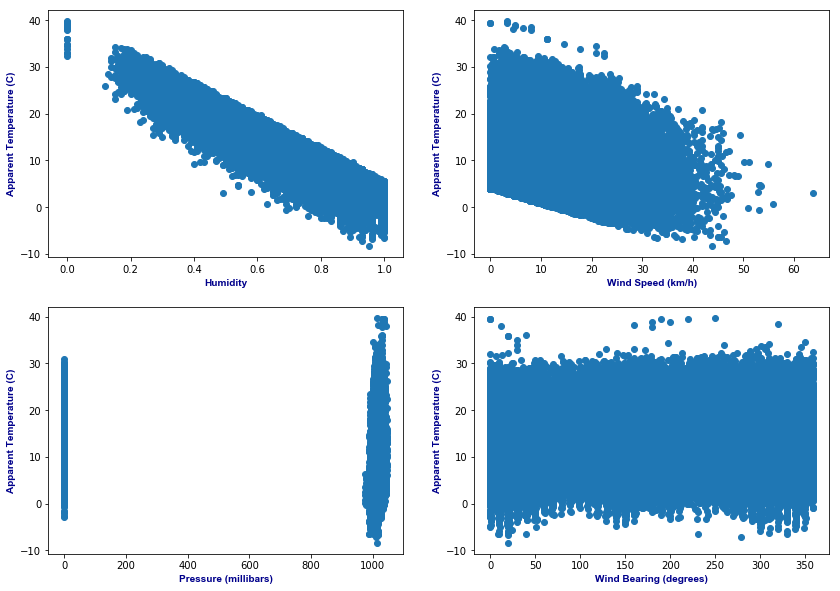

In [8]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(14,10))
degiskenler=['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']
for i,degisken in enumerate(degiskenler):
    plt.subplot(2,2,i+1)
    plt.scatter(sicaklik[degisken], tahmin)
    plt.xlabel(degisken, fontdict=eksen_font)
    plt.ylabel('Apparent Temperature (C)', fontdict=eksen_font)
plt.show()

#### Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

Hata terimi, özellikler tarafından açıklanmayan hedef değişkendeki varyasyonları açıklar. Dolayısıyla, ideal olarak hata terimi, hedef değişkenin varyasyonundaki hiçbir şeyi açıklamamalı, bunun yerine rasgele belirlenmelidir.Hatanın beklenen değeri sıfırdan farklıysa, modelimiz yanlı/biased hale gelir

In [9]:
x=sicaklik[['Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']]
tahmin=lrm.predict(x)
hatalar=y-tahmin
print('Hava durumu modelinin ortalama hatasi : {:.15f}'.format(np.mean(hatalar)))

Hava durumu modelinin ortalama hatasi : 0.000000000000001


Modelde sabit terimi eklediğimizden, modelin hatalarının ortalaması sıfırdır.

#### Varsayım 3: Homoscedasticity

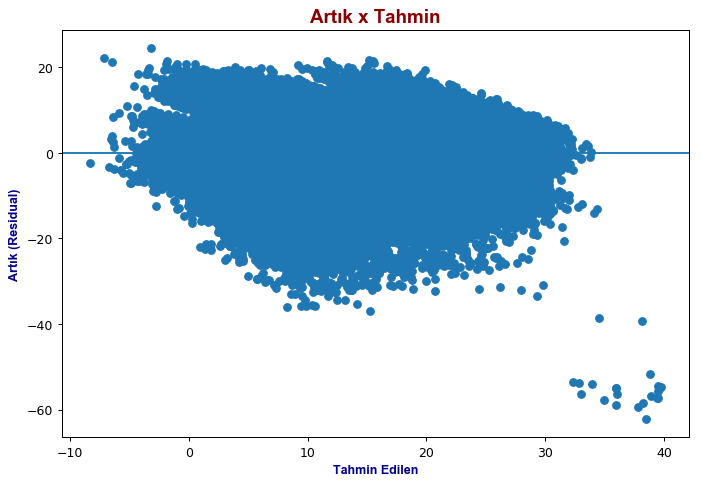

In [10]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [11]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 3575 ve p değeri : 0.000000000000000000000
Levene test değeri   : 3486.96 ve p değeri : 0.000000000000000000000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

#### Varsayım 4: Multicollinearity

In [12]:
corr = x.corr().values
np.linalg.eig(corr)

(array([1.2543905 , 0.74883167, 1.00689157, 0.98988627]),
 array([[-0.62551827,  0.63330178,  0.44054495,  0.11651563],
        [ 0.70437821,  0.70887549, -0.02581033,  0.02609035],
        [-0.16324008,  0.11184516, -0.59798385,  0.77669727],
        [ 0.29313974, -0.28968094,  0.66908093,  0.61845351]]))

İlk dizide sıfıra yakın değer olmadığından multicollinearity yoktur.

#### Varsayım 5: Hata terimleri birbiriyle ilişkisiz olmalıdır

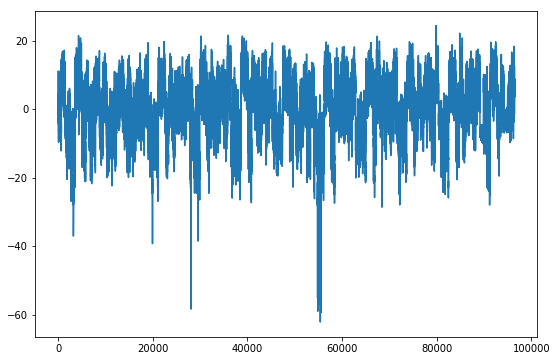

In [13]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

Hata koşullarının birbiri ile korele olmadığı görülmektedir.

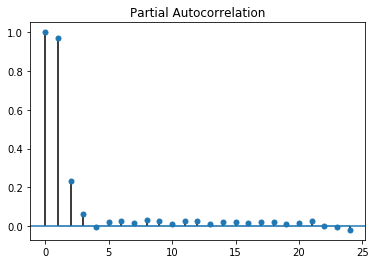

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(hatalar, lags=24)
plt.show()

Hataların değişkenlerle korelasyonu 0'a yakındır.

#### Varsayım 6: Özellikler hatalarla korele olmamalıdır

In [15]:
x_hata_ekli = pd.concat([x, hatalar], axis=1)
sutun = list(x.columns)
sutun.append('Hatalar')
x_hata_ekli.columns = sutun
x_hata_ekli.corr()['Hatalar']

Humidity                 -7.815506e-15
Wind Speed (km/h)        -1.476254e-18
Pressure (millibars)      3.038066e-16
Wind Bearing (degrees)   -3.668068e-16
Hatalar                   1.000000e+00
Name: Hatalar, dtype: float64

#### Hataların Normalliği

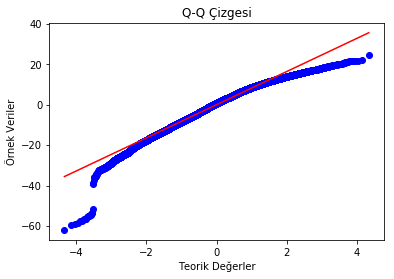

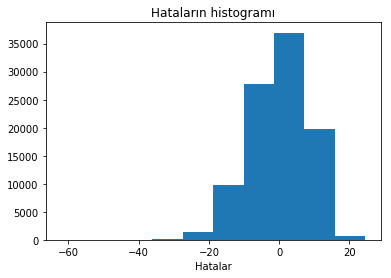

In [16]:
res = stats.probplot(hatalar, plot=plt)
plt.title("Q-Q Çizgesi")
plt.xlabel("Teorik Değerler")
plt.ylabel("Örnek Veriler")
plt.show()

plt.hist(hatalar)
plt.xlabel("Hatalar",)
plt.title("Hataların histogramı")

plt.show()

Hataların histoğram ve QQ plot grafiğine bakarak normal dağılmadığını görüyoruz.İstatistiksel olarak doğrulatmak istersek de Jargue-Bera ve Normal testlerini yaparak p_value değerlerine bakabiliriz.